In [14]:
library('ggplot2');
library('dplyr');
library('magrittr');

options(repr.plot.width =9, repr.plot.height = 3)

DAT= read.csv('data/data.csv')

# Data inspection

In [4]:
head(DAT, 4)

Country,Year,Bank.account,Location.Type,Access.to.cellphone,Household.size,Age.of.respondent,Gender.of.respondent,Relation.with.head.of.the.house,Marital.status,Education.level,Job.type
Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private


In [5]:
tail(DAT, 4)

,Country,Year,Bank.account,Location.Type,Access.to.cellphone,Household.size,Age.of.respondent,Gender.of.respondent,Relation.with.head.of.the.house,Marital.status,Education.level,Job.type
23521,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23522,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23523,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23524,Uganda,2018,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
glimpse(DAT)

Rows: 23,524
Columns: 12
$ Country                         <fct> Kenya, Kenya, Kenya, Kenya, Kenya, Ken~
$ Year                            <int> 2018, 2018, 2018, 2018, 2018, 2018, 20~
$ Bank.account                    <fct> Yes, No, Yes, No, No, No, No, No, Yes,~
$ Location.Type                   <fct> Rural, Rural, Urban, Rural, Urban, Rur~
$ Access.to.cellphone             <fct> Yes, No, Yes, Yes, No, No, Yes, Yes, Y~
$ Household.size                  <int> 3, 5, 5, 5, 8, 7, 7, 1, 3, 3, 5, 3, 6,~
$ Age.of.respondent               <int> 24, 70, 26, 34, 26, 26, 32, 42, 54, 76~
$ Gender.of.respondent            <fct> Female, Female, Male, Female, Male, Fe~
$ Relation.with.head.of.the.house <fct> Spouse, Head of Household, Other relat~
$ Marital.status                  <fct> Married/Living together, Widowed, Sing~
$ Education.level                 <fct> Secondary education, No formal educati~
$ Job.type                        <fct> Self employed, Government Dependent, S~


In [11]:
# check for missing values
is.na(DAT)%>%colSums()

Country                            Year 
                              0                               0 
                   Bank.account                   Location.Type 
                              0                               0 
            Access.to.cellphone                  Household.size 
                              0                               0 
              Age.of.respondent            Gender.of.respondent 
                              0                               0 
Relation.with.head.of.the.house                  Marital.status 
                              0                               0 
                Education.level                        Job.type 
                              0                               0

In [12]:
colnames(DAT)

[1] "Country"                         "Year"                           
 [3] "Bank.account"                    "Location.Type"                  
 [5] "Access.to.cellphone"             "Household.size"                 
 [7] "Age.of.respondent"               "Gender.of.respondent"           
 [9] "Relation.with.head.of.the.house" "Marital.status"                 
[11] "Education.level"                 "Job.type"

# Test for Equal means of ages

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


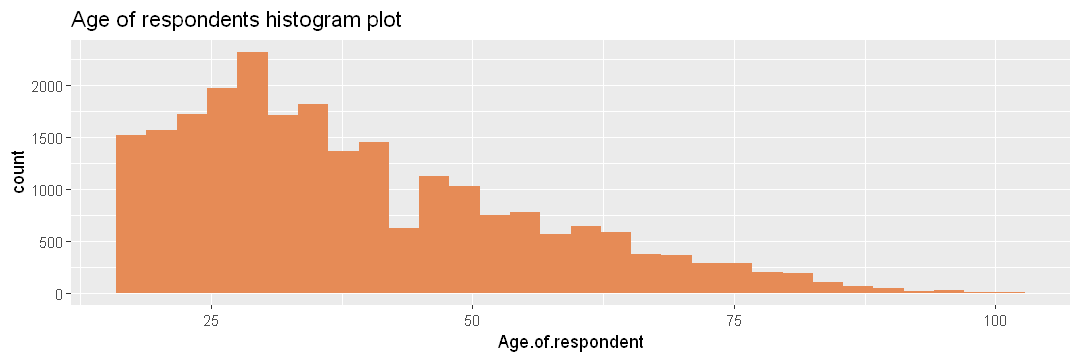

In [16]:
#hist(DAT$Age.of.respondent)


ggplot(data= DAT  )+
geom_histogram(fill= '#e68b56', mapping = aes(x =`Age.of.respondent`))+
ggtitle('Age of respondents histogram plot')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


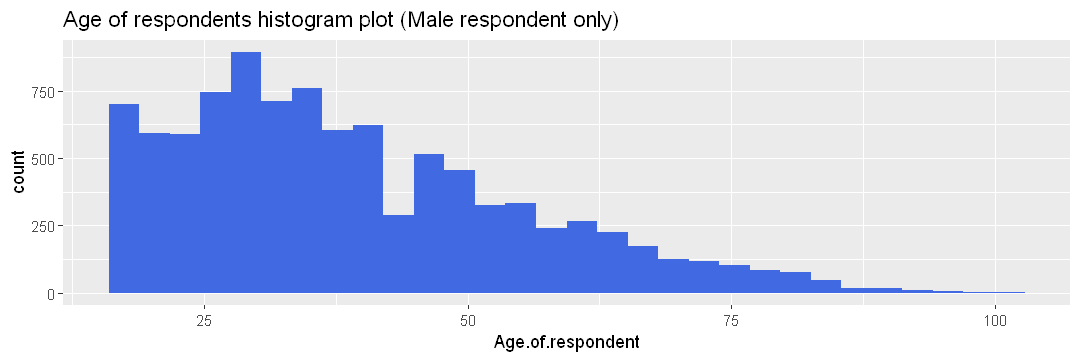

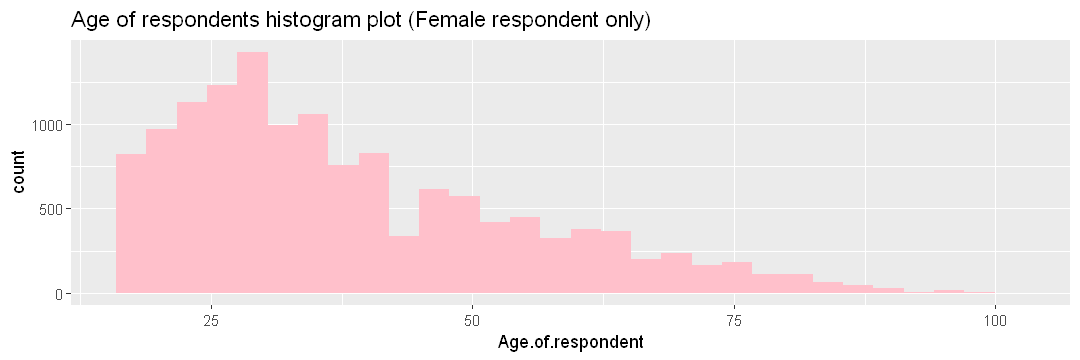

In [22]:
ggplot(data= DAT%>%filter(`Gender.of.respondent`=='Male')  )+
geom_histogram(fill= 'royalblue', mapping = aes(x =`Age.of.respondent`))+
ggtitle('Age of respondents histogram plot (Male respondent only)');


ggplot(data= DAT%>%filter(`Gender.of.respondent`=='Female')  )+
geom_histogram(fill= 'pink', mapping = aes(x =`Age.of.respondent`))+
ggtitle('Age of respondents histogram plot (Female respondent only)');

In [13]:
# test for means
t.test(DAT$Age.of.respondent)


	One Sample t-test

data:  DAT$Age.of.respondent
t = 360.26, df = 23523, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 38.59410 39.01635
sample estimates:
mean of x 
 38.80522 


In [19]:
colnames(DAT)

[1] "Country"                         "Year"                           
 [3] "Bank.account"                    "Location.Type"                  
 [5] "Access.to.cellphone"             "Household.size"                 
 [7] "Age.of.respondent"               "Gender.of.respondent"           
 [9] "Relation.with.head.of.the.house" "Marital.status"                 
[11] "Education.level"                 "Job.type"

# Test for differences in means

In [24]:
DAT%>% filter(`Gender.of.respondent`=='Male')-> df_male
DAT%>% filter(`Gender.of.respondent`=='Female')-> df_fmale

In [25]:
t.test(df_male$Age.of.respondent)
print('===========================')
t.test(df_fmale$Age.of.respondent)


	One Sample t-test

data:  df_male$Age.of.respondent
t = 235.07, df = 9646, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 38.73204 39.38343
sample estimates:
mean of x 
 39.05774 


[1] "==========================="



	One Sample t-test

data:  df_fmale$Age.of.respondent
t = 273.19, df = 13876, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 38.35251 38.90684
sample estimates:
mean of x 
 38.62968 


# Exploratory analysis

In [26]:
head(DAT)

Country,Year,Bank.account,Location.Type,Access.to.cellphone,Household.size,Age.of.respondent,Gender.of.respondent,Relation.with.head.of.the.house,Marital.status,Education.level,Job.type
Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
Kenya,2018,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed


# No. of records in each country

Country,No. of individuals
Kenya,6068
Rwanda,8735
Tanzania,6620
Uganda,2101


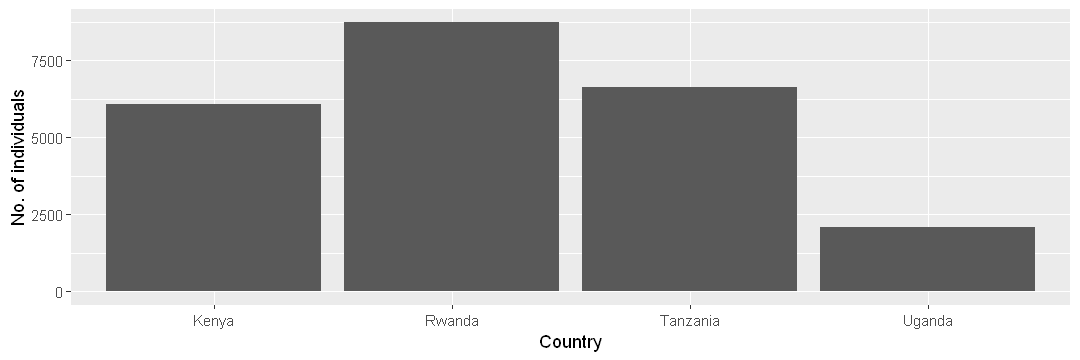

In [33]:

# counts by country
DAT%>%group_by(`Country`)%>%summarise('No. of individuals'= n())


DAT%>%group_by(`Country`)%>%summarise('No. of individuals'= n())->country
ggplot(data=country)+geom_bar(stat='identity', aes(x = `Country`, y=`No. of individuals`))

In [ ]:
# No. of records by household size

In [38]:
DAT%>%group_by(`Bank.account`)%>%summarise('No. of record'= n(),)%>%
mutate('pct of record'= `No. of record`/ sum(`No. of record`))

Bank.account,No. of record,pct of record
No,20212,0.8592076
Yes,3312,0.1407924


# No. of records by household size

In [56]:
DAT%>%group_by(`Household.size`)%>%
summarise(`No. of record` = n())%>%
mutate('pct of record (%)'= `No. of record`/sum(`No. of record`)*100)%>%
arrange(desc(`No. of record`))

Household.size,No. of record,pct of record (%)
2,5229,22.228362523
3,3920,16.663832682
4,3474,14.767896616
1,3057,12.995238905
5,2853,12.128039449
6,2096,8.910049311
7,1400,5.951368815
8,751,3.192484271
9,363,1.543104914
10,190,0.807685768


# No. of records by Location

In [46]:
DAT%>%group_by(`Location.Type`)%>%
summarise(`No. of record` = n())%>%
mutate('pct of record (%)'= `No. of record`/sum(`No. of record`)*100)

Location.Type,No. of record,pct of record (%)
Rural,14343,60.97177
Urban,9181,39.02823


In [ ]:
# No. of records by Access to cellphone

In [55]:
DAT%>%group_by(`Access.to.cellphone`)%>%
summarise(`No. of record` = n())%>%
mutate('pct of record (%)'= `No. of record`/sum(`No. of record`)*100)%>%
arrange(desc(`No. of record`))

Access.to.cellphone,No. of record,pct of record (%)
Yes,17454,74.19657
No,6070,25.80343


# No. of records by Education

In [54]:
DAT%>%group_by(`Education.level`)%>%
summarise(`No. of record` = n())%>%
mutate('pct of record (%)'= `No. of record`/sum(`No. of record`)*100)%>%
arrange(desc(`No. of record`))

Education.level,No. of record,pct of record (%)
Primary education,12791,54.3742561
No formal education,4515,19.1931644
Secondary education,4223,17.9518789
Tertiary education,1157,4.9183812
Vocational/Specialised training,803,3.4135351
Other/Dont know/RTA,35,0.1487842


# No. of records by Job type

In [53]:
DAT%>%group_by(`Job.type`)%>%
summarise(`No. of record` = n())%>%
mutate('pct of record (%)'= `No. of record`/sum(`No. of record`)*100)%>%
arrange(desc(`No. of record`))

Job.type,No. of record,pct of record (%)
Self employed,6437,27.3635436
Informally employed,5597,23.7927223
Farming and Fishing,5441,23.1295698
Remittance Dependent,2527,10.7422207
Other Income,1080,4.5910559
Formally employed Private,1055,4.4847815
No Income,627,2.6653630
Formally employed Government,387,1.6451284
Government Dependent,247,1.0499915
Dont Know/Refuse to answer,126,0.5356232


# Scatter diagram of age of respondent vs house hold size

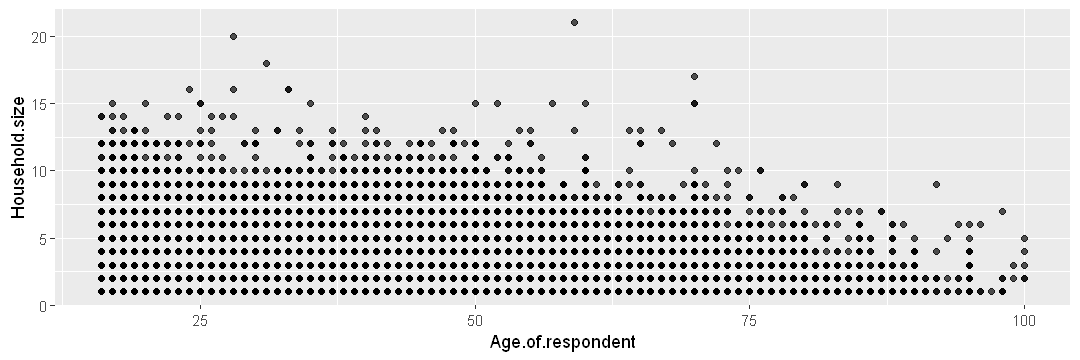

In [61]:
ggplot(data=DAT, )+geom_point(mapping= aes(x=`Age.of.respondent`, y=`Household.size`), fill='royalblue', alpha=.67)